In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [7]:
df = pd.read_csv('../data_exploration/housing.csv')
df.shape

(20640, 10)

In [8]:
# Drop rows with target value is max
df2 = df[df['median_house_value'] != df['median_house_value'].max()]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_train, df_test = train_test_split(df, test_size=.2)

In [11]:
df_test.to_csv('housing_test.csv', index=False)
df_train.to_csv('housing_train.csv', index=False)

In [7]:
# Drop rows where outliers 

std7 = df_train.max() - (6.1*df_train.std() + df_train.quantile(q=0.75)) 
index = std7[std7>0].index

max_threshold = {}
for i in index:
    max_threshold[i] = df_train[i].quantile(0.99)

/var/folders/jq/v410fr9n359bq2pnqqynmpy40000gp/T/ipykernel_84034/1762537105.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std7 = df2.max() - (6.1*df2.std() + df2.quantile(q=0.75))


In [8]:
index, max_threshold

(Index(['households', 'median_income', 'population', 'total_bedrooms',
        'total_rooms'],
       dtype='object'),
 {'households': 2039.0400000000009,
  'median_income': 8.117912000000002,
  'population': 5982.720000000016,
  'total_bedrooms': 2283.4799999999996,
  'total_rooms': 11322.560000000012})

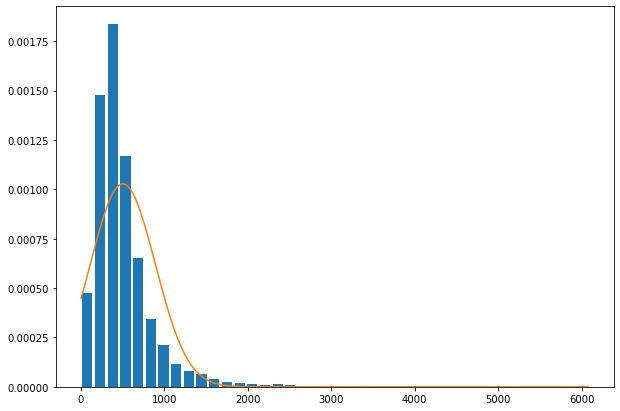

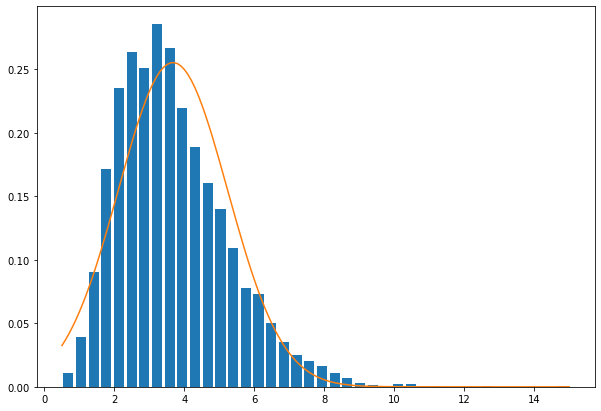

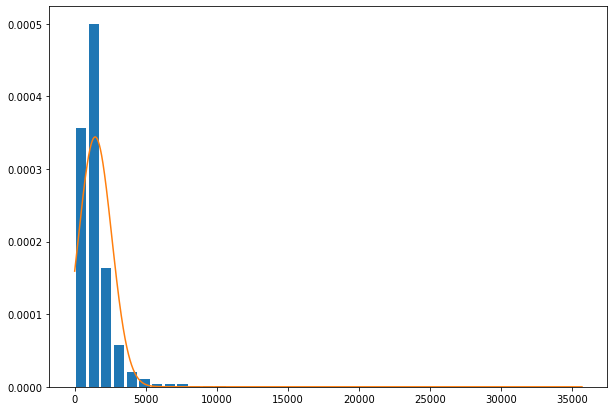

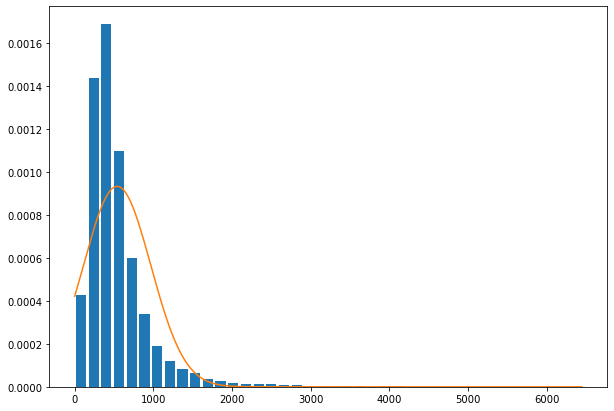

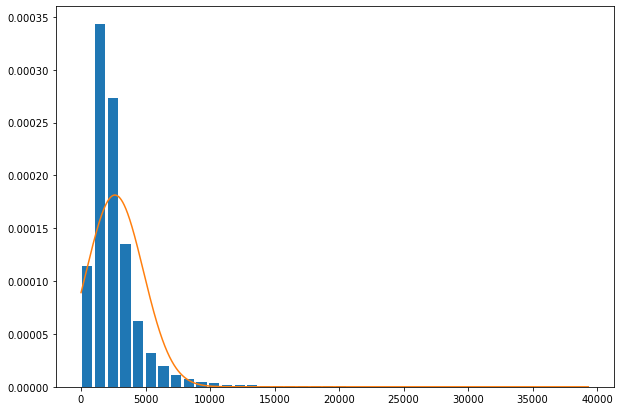

In [9]:
for d in index:
    plt.figure(figsize=(10,7))
    plt.hist(df_train[d], bins=40, rwidth=0.8, density=True)

    rng = np.arange(df2[d].min(), df2[d].max(), 0.1)
    plt.plot(rng, norm.pdf(rng,df_train[d].mean(),df_train[d].std()))
    plt.show()

In [10]:
df3 = df_train.copy()
for i in index:
    df3 = df2[df2[i]<max_threshold[i]]

In [14]:
df3.shape, df2.shape, df.shape

((15591, 10), (15749, 10), (20640, 10))

In [18]:
df3.shape[0]/df_train.shape[0]

0.9442223837209303

In [12]:
df3.to_csv('housing_train.csv', index=False)